# 패키지 임포트

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
warnings.filterwarnings('ignore') # 파일 오류 무시
plt.rc('font', family='Malgun Gothic') # 차트에 한글 글자 깨짐 방지

# 데이터 불러오기(대여이력)

In [2]:
pd.read_csv('../../data/public_bike/서울특별시 공공자전거 대여정보_201906_1.csv', encoding='cp949')

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0
...,...,...,...,...,...,...,...,...,...,...,...
799955,SPB-22522,2019-06-01 17:47:47,726,목동3단지 시내버스정류장,6,2019-06-01 18:44:20,735,영도초등학교,5,52,2020.0
799956,SPB-01434,2019-06-01 17:49:18,735,영도초등학교,1,2019-06-01 18:55:01,735,영도초등학교,2,65,7990.0
799957,SPB-18503,2019-06-01 17:48:02,735,영도초등학교,8,2019-06-01 18:55:29,735,영도초등학교,4,66,7910.0
799958,SPB-19656,2019-06-01 18:55:01,762,오목로 무중력지대 앞,1,2019-06-01 19:08:12,735,영도초등학교,10,13,2120.0


In [3]:
# 데이터 부르기
bikes_temp = {}

for i in range(3):
    bikes_temp[i] = pd.read_csv(f'../../data/public_bike/서울특별시 공공자전거 대여정보_201906_{i+1}.csv', encoding='cp949', parse_dates=['대여일시'])

bikes_temp[0].head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0


# 데이터 가공

In [4]:
# 데이터 병합
bikes = pd.concat(bikes_temp, axis='index', ignore_index=True)
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0


In [21]:
# 데이터 조회
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      int64         
 10  이용거리      float64       
 11  요일        object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 202.8+ MB


## 요약 통계(수치, 문자)

In [22]:
# 수치형 데이터 통계
bikes.describe()

,대여일시,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2215632,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06
mean,2019-06-16 08:40:31.024135936,1.226154e+03,7.014750e+00,1.228354e+03,6.967391e+00,2.716998e+01,3.912916e+03
min,2019-06-01 00:00:02,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2019-06-08 22:04:52,5.050000e+02,3.000000e+00,5.120000e+02,3.000000e+00,8.000000e+00,1.220000e+03
50%,2019-06-16 15:13:49.500000,1.159000e+03,6.000000e+00,1.159000e+03,6.000000e+00,1.700000e+01,2.270000e+03
75%,2019-06-23 20:22:45,1.846000e+03,1.000000e+01,1.839000e+03,1.000000e+01,3.700000e+01,4.670000e+03
max,2019-06-30 23:59:56,9.998000e+03,4.000000e+01,9.998000e+03,4.000000e+01,3.133000e+03,2.323100e+05
std,NaN,8.499197e+02,5.244626e+00,8.462296e+02,5.238154e+00,2.908119e+01,5.145471e+03


In [23]:
# 문자형 데이터 통계
bikes.describe(include=['object', 'datetime64'])

,자전거번호,대여일시,대여 대여소명,반납일시,반납대여소명,요일
count,2215632,2215632,2215632,2215632,2215632,2215632
unique,19029,NaN,1543,1321020,1543,7
top,SPB-17237,NaN,뚝섬유원지역 1번출구 앞,2019-06-13 08:31:30,뚝섬유원지역 1번출구 앞,토
freq,292,NaN,12617,18,14019,375943
mean,NaN,2019-06-16 08:40:31.024135936,NaN,NaN,NaN,NaN
min,NaN,2019-06-01 00:00:02,NaN,NaN,NaN,NaN
25%,NaN,2019-06-08 22:04:52,NaN,NaN,NaN,NaN
50%,NaN,2019-06-16 15:13:49.500000,NaN,NaN,NaN,NaN
75%,NaN,2019-06-23 20:22:45,NaN,NaN,NaN,NaN
max,NaN,2019-06-30 23:59:56,NaN,NaN,NaN,NaN


## 누락값 검사

In [24]:
# 누락값 검사
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
요일          0
dtype: int64

In [25]:
# 대여일시 정보 추출
# bikes['대여일시'] = bikes['대여일시'].astype('datetime64[ms]') # datetime으로 안 되어 있을 시 실행
bike_series = bikes['대여일시']
display(bike_series.shape)
display(bike_series.head(2))
bike_df = bikes[['대여 대여소번호', '대여 대여소명']]
display(bike_df.shape)
display(bike_df.head(2))

(2215632,)

0   2019-06-03 08:49:27
1   2019-06-03 08:33:22
Name: 대여일시, dtype: datetime64[ns]

(2215632, 2)

,대여 대여소번호,대여 대여소명
0,646,장한평역 1번출구 (국민은행앞)
1,526,용답토속공원 앞


In [26]:
# apply 메서드 확인
bikes['대여일시'].dt.day_of_week.apply(lambda x: '평일' if x < 5 else '주말')

0          평일
1          평일
2          평일
3          평일
4          평일
           ..
2215627    평일
2215628    평일
2215629    평일
2215630    평일
2215631    평일
Name: 대여일시, Length: 2215632, dtype: object

## 요일 컬럼 추가

In [27]:
요일 = ['월','화','수','목','금','토','일']
bikes['요일'] = bikes['대여일시'].dt.day_of_week.apply(lambda x : 요일[x])
bikes['요일']

0          월
1          월
2          수
3          수
4          월
          ..
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 요일, Length: 2215632, dtype: object

In [28]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0,월


# 데이터 불러오기(대여소정보)

In [29]:
bike_shop = pd.read_csv('../../data/public_bike/공공자전거 대여소 정보(23.06월 기준).csv', encoding='euc-kr')
display(bike_shop.shape)
display(bike_shop.head(2))

(2749, 14)

,대여소 번호,보관소(대여소)명,자치구,소재지(위치),위도,경도,설치시기,설치형태,운영방식,LCD,QR,거치대수,거치대수.1,소재지(위치).1
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR,NaN,NaN,NaN,NaN
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR,NaN,NaN,NaN,NaN


# 데이터 가공(대여이력 + 대여소정보)

In [30]:
bikes_gu = bike_shop[['자치구', '대여소 번호', '보관소(대여소)명', '위도', '경도']]
bikes_gu.head(2)

,자치구,대여소 번호,보관소(대여소)명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451
1,종로구,302,경복궁역 4번출구 뒤,37.575947,126.974060


In [31]:
bikes_gu = bikes_gu.rename(columns={'보관소(대여소)명':'대여소명', '대여소 번호' : '대여소번호'})
bikes_gu.head(2)

,자치구,대여소번호,대여소명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451
1,종로구,302,경복궁역 4번출구 뒤,37.575947,126.974060


In [32]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월


In [33]:
# 대여소번호, 대여소명을 기준으로 병합
# pd.merge( df1, df2, left_on=‘df1_컬럼명’, right_on=‘df2_컬럼명’ )
# left_on : df1에 있는 컬럼명
# right_on : df2에 있는 컬럼명
bikes = pd.merge(bikes, bikes_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,대여소번호,대여소명,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,646,장한평역 1번출구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,526,용답토속공원 앞,37.563511,127.056725


## 중복되는 컬럼 삭제

In [34]:
# 중복되는 컬럼 삭제
bikes = bikes.drop(['대여소번호', '대여소명'], axis='columns')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725


## 컬럼명 변경

In [35]:
# 컬럼명 변경
bikes = bikes.rename(columns={'자치구':'대여구',
                            '위도' : '대여점위도',
                            '경도' : '대여점경도'})
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725


# 데이터 분석

## 시간 개념에 따른 시각화

<Axes: xlabel='요일', ylabel='count'>

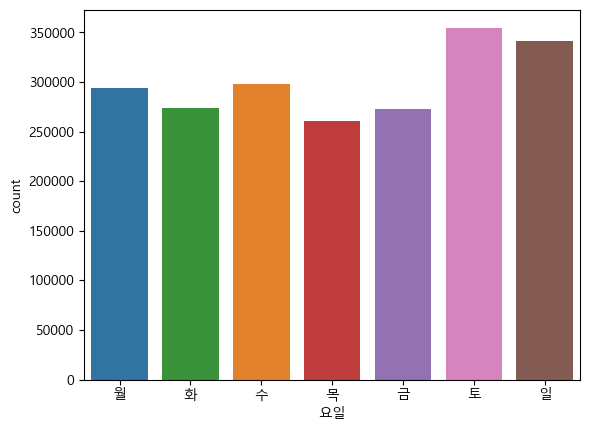

In [36]:
# seaborn으로 시각화
# sns.countplot( data=데이터프레임, x=‘``집계할 컬럼명’, hue=‘집계할 컬럼명’ )
sns.countplot(data=bikes, x='요일', order=['월','화','수','목','금','토','일'], hue='요일')

In [37]:
# 대여시간대, 일자 컬럼 생성
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes['일자'] = bikes['대여일시'].dt.day
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점위도,대여점경도,대여시간대,일자
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506,8,3
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725,8,3


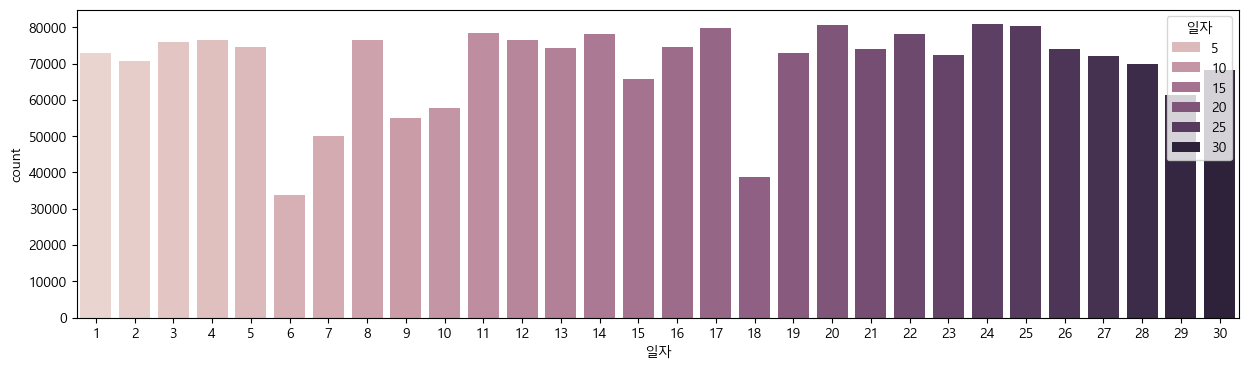

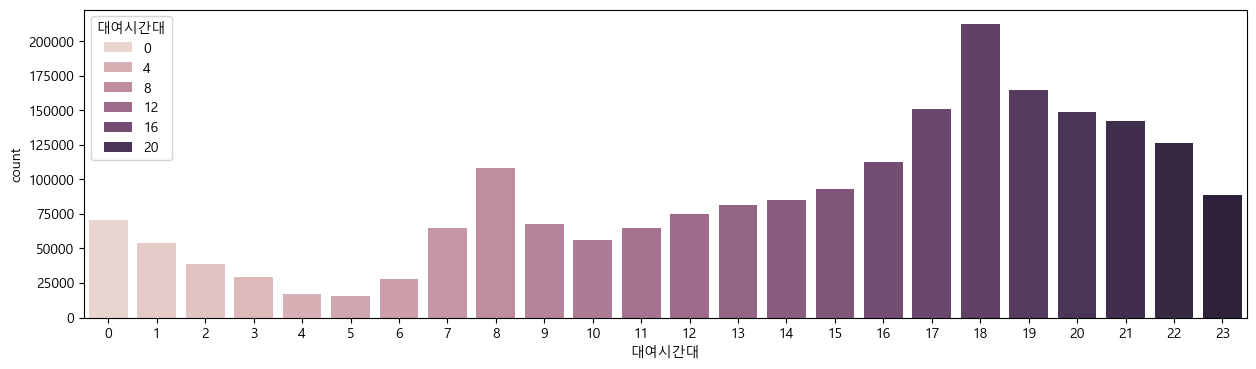

In [38]:
# sns.countplot( data=데이터프레임, x=‘``집계할 컬럼명’, hue=‘집계할 컬럼명’ )
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자', hue='일자')
plt.show()
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='대여시간대')
plt.show()

### 대여시간대 × 요일 따릉이 이용건수

In [39]:
# 피봇테이블 생성
bikes.pivot_table(index='대여시간대',
                columns='요일', 
                values='자전거번호', 
                aggfunc='count')

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,7903,9022,8187,7072,16097,12761,9345
1,6341,7116,6832,4580,11099,10591,7135
2,4506,5548,5030,3117,8387,7977,4278
3,2870,3797,3262,1996,8339,5885,2968
4,1874,2283,2044,1456,3870,3406,1878
5,1937,2313,2351,1956,2424,2485,2208
6,4013,4269,5076,4212,3116,3161,4368
7,9732,10744,13057,10771,4168,4604,11432
8,16242,16908,22260,17769,6266,8232,20869


In [40]:
# 요일과 시간대별 이용건수 피봇테이블
hourly_dayofweek_ride = bikes.pivot_table(
                        index='대여시간대',
                        columns='요일',
                        values='자전거번호',
                        aggfunc='count')
hourly_dayofweek_ride

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,7903,9022,8187,7072,16097,12761,9345
1,6341,7116,6832,4580,11099,10591,7135
2,4506,5548,5030,3117,8387,7977,4278
3,2870,3797,3262,1996,8339,5885,2968
4,1874,2283,2044,1456,3870,3406,1878
5,1937,2313,2351,1956,2424,2485,2208
6,4013,4269,5076,4212,3116,3161,4368
7,9732,10744,13057,10771,4168,4604,11432
8,16242,16908,22260,17769,6266,8232,20869


#### 대여시간대 × 요일 이용건수 시각화

<Axes: title={'center': '대여시간대 × 요일 이용건수'}, xlabel='대여시간대'>

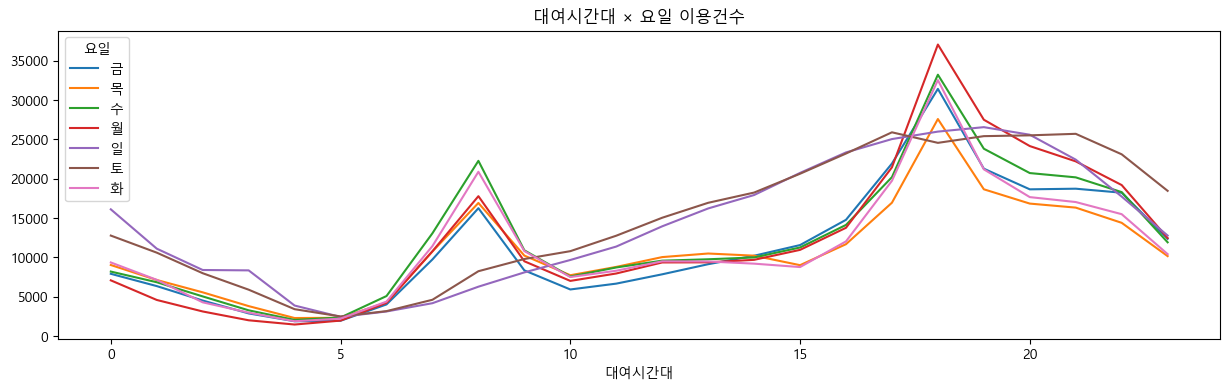

In [41]:
# 꺽은선 그래프
hourly_dayofweek_ride.plot(kind='line',title='대여시간대 × 요일 이용건수',figsize=(15,4))

<Axes: title={'center': '대여시간대 × 요일 이용건수'}, xlabel='대여시간대'>

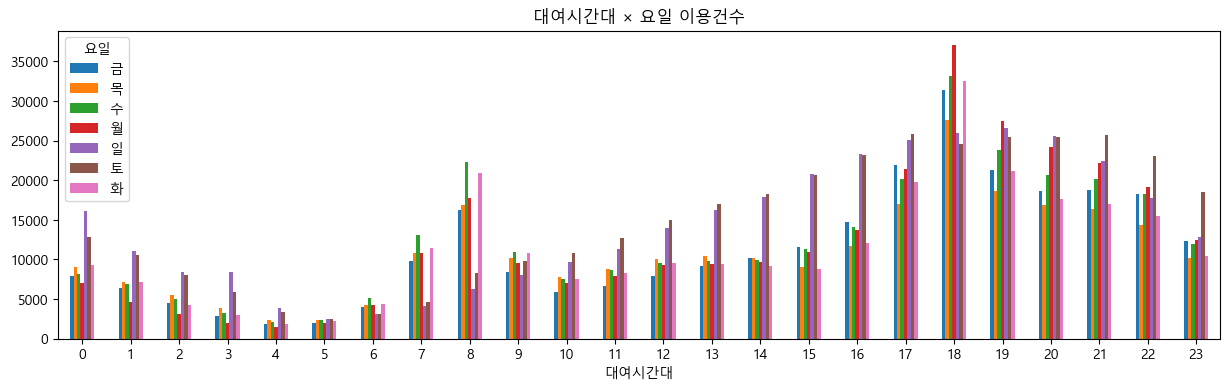

In [42]:
# 막대 그래프
hourly_dayofweek_ride.plot(kind='bar',title='대여시간대 × 요일 이용건수',figsize=(15,4),rot=0) # rot : x축 인덱스 글자 회전

<Axes: xlabel='대여시간대', ylabel='count'>

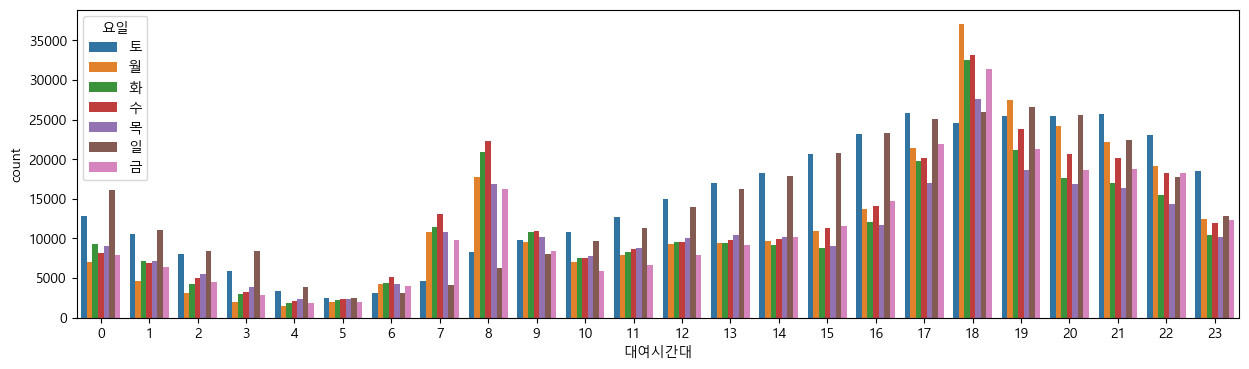

In [43]:
# seaborn countplot과 pivot table의 비교
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='요일')

#### 히트맵

<Axes: xlabel='요일', ylabel='대여시간대'>

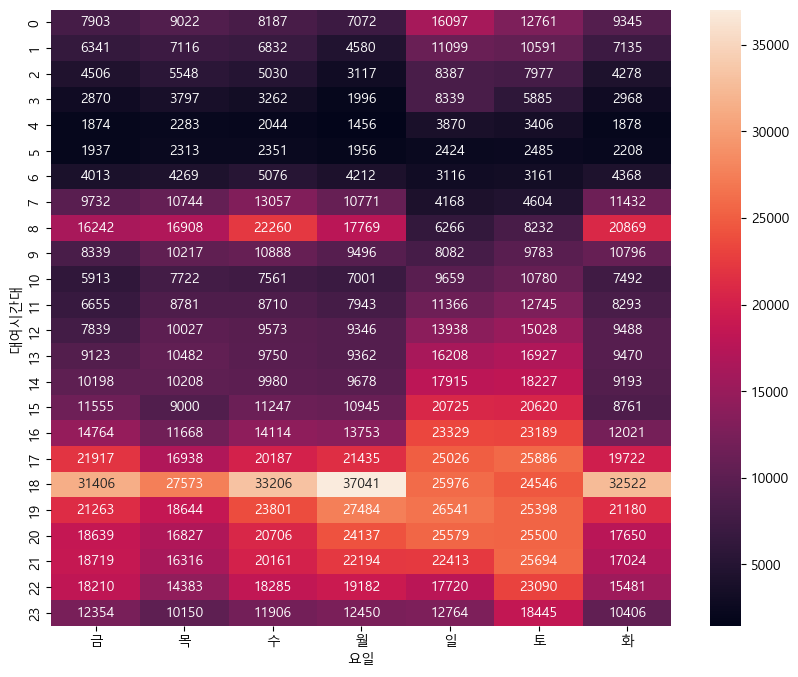

In [44]:
# 2차원 자료 시각화
# annot=True : 색깔을 나타내는 칸에 해당 집계 수량도 표시
# fmt=‘d’ : 포맷을 정수로 나타낸다는 표시
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')

### 대여시간대 × 주말구분 따릉이 이용건수

In [45]:
# 주말구분 컬럼 생성
bikes['주말구분'] = bikes['대여일시'].dt.day_of_week.apply(lambda x: '평일' if x < 5 else '주말')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점위도,대여점경도,대여시간대,일자,주말구분
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506,8,3,평일
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725,8,3,평일


In [46]:
weekedays_hourly_ride = bikes.pivot_table(
                        index='대여시간대',
                        columns='주말구분',
                        values='자전거번호',
                        aggfunc='count')
weekedays_hourly_ride

주말구분,주말,평일
대여시간대,,
0,28858,41529
1,21690,32004
2,16364,22479
3,14224,14893
4,7276,9535
5,4909,10765
6,6277,21938
7,8772,55736
8,14498,94048


#### 대여시간대 × 주말구분 따릉이 이용건수 시각화

<Axes: xlabel='대여시간대', ylabel='count'>

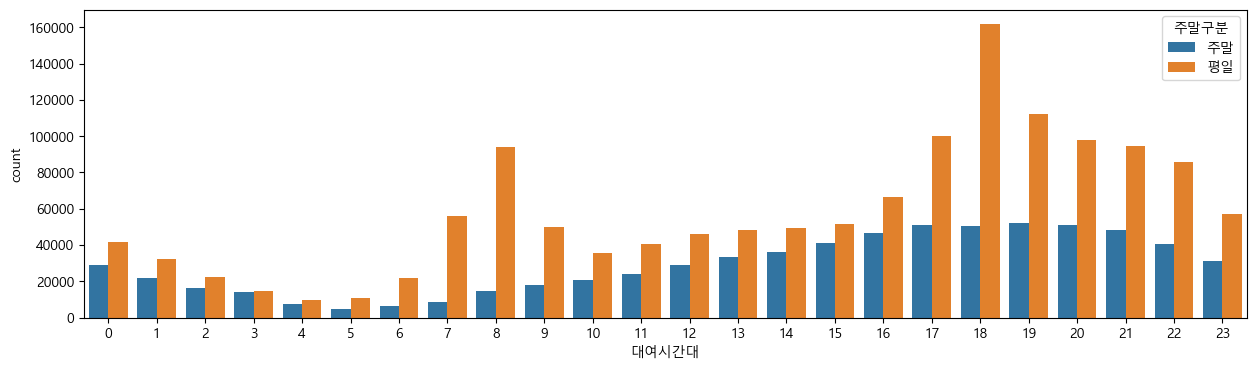

In [47]:
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='주말구분')

#### 히트맵

<Axes: xlabel='주말구분', ylabel='대여시간대'>

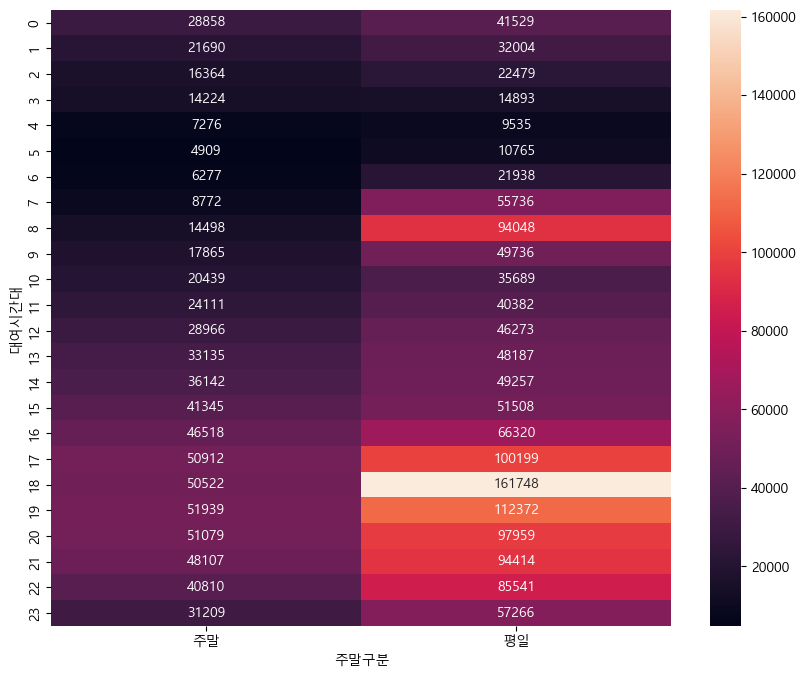

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(data=weekedays_hourly_ride, annot=True, fmt='d')

## 장소적 개념에 따른 시각화

In [49]:
# 구별이용시간평균 피봇테이블 생성
구별이용시간평균 = bikes.pivot_table(
                            index='대여구', 
                            values='이용시간',
                            aggfunc='mean').reset_index() # 대여구 데이터를 인덱스에서 컬럼으로 이동
구별이용시간평균

,대여구,이용시간
0,강남구,31.663566
1,강동구,25.434480
2,강북구,23.351559
3,강서구,23.116492
4,관악구,26.518392
5,광진구,25.109829
6,구로구,26.646381
7,금천구,26.430906
8,노원구,24.178508
9,도봉구,24.976752


In [50]:
# 이용시간 기준 오름차순 정렬
구별이용시간평균 = 구별이용시간평균.sort_values(by='이용시간',
                                            ascending=True)
구별이용시간평균

,대여구,이용시간
3,강서구,23.116492
16,성북구,23.183428
22,종로구,23.256120
2,강북구,23.351559
10,동대문구,23.886195
24,중랑구,24.112678
8,노원구,24.178508
9,도봉구,24.976752
5,광진구,25.109829
21,은평구,25.345993


### folium으로 지도 시각화

In [51]:
# map = folium.Map( location=지도중심위치, zoom_start=11 )
# folium.Map : 중심위치와 배율을 조정해서 지도를 초기화해서 보여준다.
# location=지도중심위치 : 중심위치의 위도와 경도를 입력한다.
# zoom_start=11 : 배율을 입력한다. 값이 크면 더 좁은 지역을 크게 볼 수 있다.
lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()
center = [lat, lon]
map = folium.Map( location=center, zoom_start=11, width=700, height=700)
map

#### 지역구와 해당 수치 데이터 표시

In [52]:
import json # json 파일을 다루는 패키지

with open('../../data/public_bike/seoul.json', 'r', encoding='utf-8') as f:
    서울시지도 = json.load(f) # 서울시 지도데이터를 변수 할당

# map에 정보 추가
folium.Choropleth(
            geo_data=서울시지도, # 지역구를 표시할 지리 데이터
            data=구별이용시간평균, # 지도에 표시될 데이터프레임
            columns=['대여구', '이용시간'], # 데이트 프레임에서 지역구와 이용시간 컬럼
            fill_color='YlGnBu', # 표현할 색깔 : Yellow - Green - Blue
            key_on='feature.properties.name' # json파일에서 key값
).add_to(map)
map

<Axes: title={'center': '구별 이용시간 평균'}>

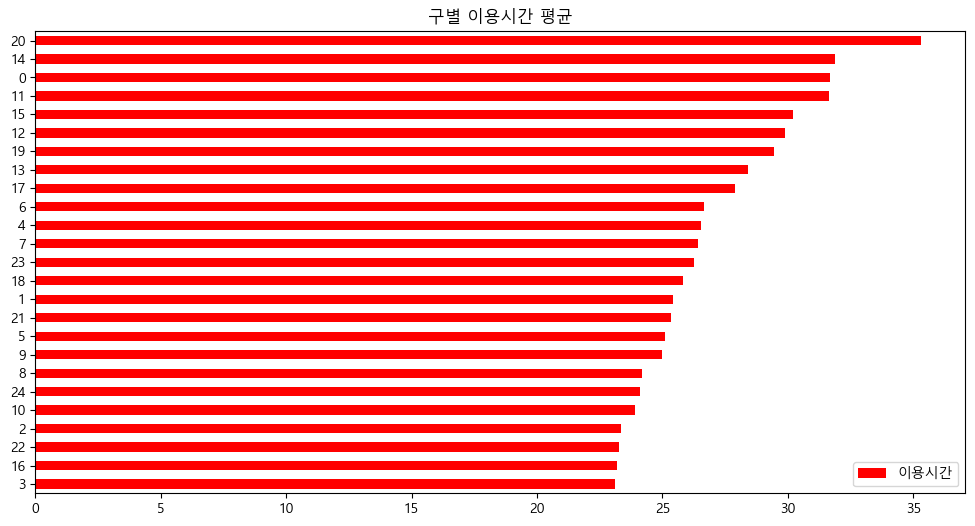

In [53]:
# 막대그래프 표시
구별이용시간평균.plot(kind='barh', title='구별 이용시간 평균', figsize=(12,6), color = 'r')

## 시간 × 장소적 특징 연관 분석 후 시각화

### 대여시간대 × 대여구별 피봇 테이블

In [54]:
hourly_gu_use = bikes.pivot_table(
                            index='대여시간대',
                            columns='대여구',
                            values='자전거번호',
                            aggfunc='count')
hourly_gu_use

대여구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
대여시간대,,,,,,,,,,,,,,,,,,,,,
0,2613,3145,1967,4283,3525,5012,2761,781,4589,1500,...,2732,2977,5673,2111,4439,1641,2193,1652,933,2224
1,2643,2266,1606,3118,2617,3386,1845,634,3432,1277,...,1934,2375,4931,1779,2931,1334,1718,1273,692,1844
2,2348,1805,1334,2318,1775,2343,1322,492,2438,834,...,1285,1826,3172,1148,1972,935,1227,961,530,1357
3,1681,1353,900,1799,1451,1734,872,325,1828,658,...,1040,1230,2284,853,1461,755,887,730,461,1120
4,914,606,581,1099,924,950,583,153,1003,395,...,686,645,1192,478,1012,512,474,540,327,560
5,646,666,385,1041,675,894,549,155,802,409,...,624,499,1037,558,1070,305,485,712,361,559
6,1309,1166,488,2051,966,1550,1097,488,1351,493,...,979,1005,2235,983,2426,541,978,998,391,770
7,2397,2398,1027,4600,2638,3189,3127,1595,2724,1106,...,2449,2128,4983,2656,5854,1094,2319,2466,943,2006
8,4900,3684,1479,8909,4080,6429,4737,3344,4346,1511,...,4933,3498,8790,3846,9104,1866,3215,4056,1565,2863


### 히트맵

<Axes: xlabel='대여시간대', ylabel='대여구'>

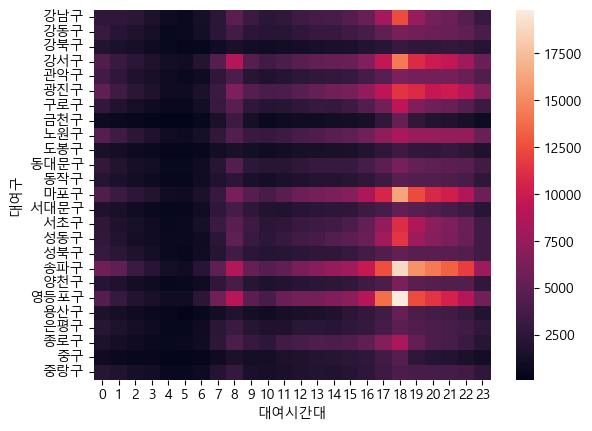

In [55]:
plt.plot(figsize=(10,8))
sns.heatmap(data=hourly_gu_use.T)

### 박스 그래프

<Axes: xlabel='대여구'>

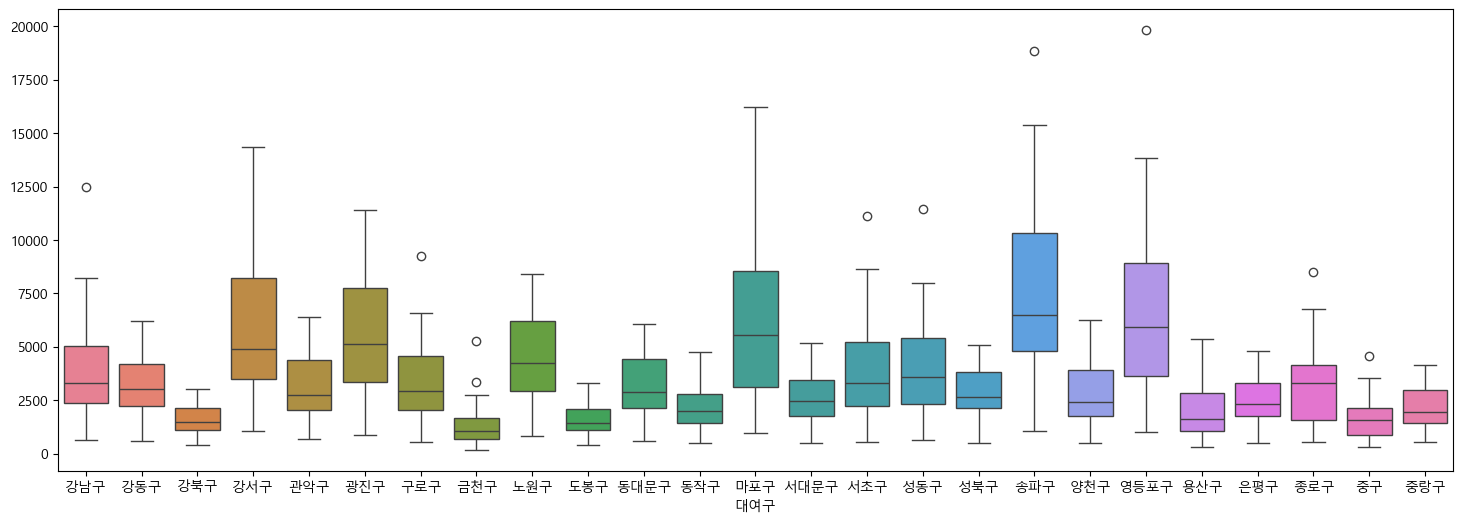

In [56]:
# seaborn의 boxplot
plt.figure(figsize=(18,6))
sns.boxplot(data=hourly_gu_use)

## 주말과 평일에 인기 있는 대여소 상위 50개 지도에 표시해보기

### 인기 대여소 50개 찾기

In [57]:
# 대여 대여소 × 주말구분의 이용거수 계산
rent_bike = bikes.pivot_table(
                        index=['대여 대여소명', '대여점위도', '대여점경도'],
                        columns='주말구분',
                        values='자전거번호',
                        aggfunc='count')
rent_bike.head(2)

,,주말구분,주말,평일
대여 대여소명,대여점위도,대여점경도,,
(구)신한은행 중랑교지점,37.598591,127.079819,391,832
3호선 매봉역 3번출구앞,37.486767,127.046761,443,1049


#### 인기 있는 주말 대여소 50개 찾기

In [58]:
# 인기 있는 주말 대여소 50개 찾기
rent_bike.nlargest(50, '주말').head(5)

,,주말구분,주말,평일
대여 대여소명,대여점위도,대여점경도,,
뚝섬유원지역 1번출구 앞,37.531860,127.067192,5777,6840
여의나루역 1번출구 앞,37.527157,126.931900,5286,6241
"고속터미널역 8-1번, 8-2번 출구 사이",37.506199,127.003944,3932,4556
봉림교 교통섬,37.484085,126.926888,3699,5986
롯데월드타워(잠실역2번출구 쪽),37.513126,127.100960,3231,5383


In [59]:
rent_bike.nlargest(50, '주말')['주말']

대여 대여소명                  대여점위도      대여점경도     
뚝섬유원지역 1번출구 앞            37.531860  127.067192    5777
여의나루역 1번출구 앞             37.527157  126.931900    5286
고속터미널역 8-1번, 8-2번 출구 사이  37.506199  127.003944    3932
봉림교 교통섬                  37.484085  126.926888    3699
롯데월드타워(잠실역2번출구 쪽)        37.513126  127.100960    3231
건대입구역 사거리(롯데백화점)         37.539139  127.070618    3169
홍대입구역 2번출구 앞             37.557438  126.923821    2922
잠실새내역 5번 출구 뒤            37.511982  127.085053    2632
당산육갑문                    37.535339  126.903679    2327
신도림역 1번 출구 앞             37.509720  126.890099    2304
합정역 7번출구 앞               37.548645  126.912826    2194
동방1교                     37.471828  126.933922    2170
서울숲 관리사무소                37.542816  127.042084    2141
안암로터리 버스정류장 앞            37.582592  127.028976    2058
올림픽공원역 3번출구              37.516258  127.130592    2011
CJ 드림시티                  37.599491  126.916862    2002
당산역 10번출구 앞              37.533421  126.902237    1978
노들역 1번출구          

In [60]:
주말대여점50 = rent_bike.nlargest(50, '주말')['주말'].reset_index()
주말대여점50.head()

,대여 대여소명,대여점위도,대여점경도,주말
0,뚝섬유원지역 1번출구 앞,37.531860,127.067192,5777
1,여의나루역 1번출구 앞,37.527157,126.931900,5286
2,"고속터미널역 8-1번, 8-2번 출구 사이",37.506199,127.003944,3932
3,봉림교 교통섬,37.484085,126.926888,3699
4,롯데월드타워(잠실역2번출구 쪽),37.513126,127.100960,3231


##### 주말 인기 대여소 folium으로 지도 시각화

In [61]:
# folium.Marker( location=[위도, 경도], popup=‘이름’, icon = folium.Icon() ).add_to(map)
# folium.Marker : 지도에서 특정 위치를 아이콘으로 표시
# location=[위도, 경도] : 아이콘이 표시될 위치
# popup=‘이름’ : 아이콘으로 표시한 곳의 이름으로 아이콘을 클릭하면 이름이 나온다.
# icon = folium.Icon(color=‘red’, icon=‘star’) : 지정하지 않으면 기본적으로 파란색 info 모양의 아이콘으로 표시하고 folium.Icon을 사용하여 다른 것을 지정할 수 있다
map1 = folium.Map( location=center, zoom_start=11, width=700, height=700)
for i in 주말대여점50.index:
    sub_lat = 주말대여점50.loc[i, '대여점위도']
    sub_lon = 주말대여점50.loc[i, '대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여소명 = 주말대여점50.loc[i, '대여 대여소명']
    iframe = "<pre><b>대여소 이름:</b><br>"+str(대여소명)+"</pre>" # 팝업창 텍스트
    popup = folium.Popup(iframe, min_width=100, max_width=500) # 팝업창 크기 조절
    # 지도에 데이터 찍어서 보여주기
    folium.Marker(
        location=대여점위치,
        popup=popup,
        tooltip=대여소명, # 마우스 커서 올리면 뜨는 창
    ).add_to(map1)

map1

#### 인기 있는 평일 대여소 50개 찾기

In [62]:
평일대여점50 = rent_bike.nlargest(50, '평일')['평일'].reset_index()
평일대여점50.head()

,대여 대여소명,대여점위도,대여점경도,평일
0,뚝섬유원지역 1번출구 앞,37.531860,127.067192,6840
1,여의나루역 1번출구 앞,37.527157,126.931900,6241
2,봉림교 교통섬,37.484085,126.926888,5986
3,홍대입구역 2번출구 앞,37.557438,126.923821,5617
4,롯데월드타워(잠실역2번출구 쪽),37.513126,127.100960,5383


In [65]:
for i in 평일대여점50.index:
    sub_lat = 평일대여점50.loc[i, '대여점위도']
    sub_lon = 평일대여점50.loc[i, '대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여소명 = 평일대여점50.loc[i, '대여 대여소명']
    iframe = "<pre><b>대여소 이름:</b><br>"+str(대여소명)+"</pre>" # 팝업창 텍스트
    popup = folium.Popup(iframe, min_width=100, max_width=400) # 팝업창 크기 조절
    # 지도에 데이터 찍어서 보여주기
    folium.Marker(
        location=대여점위치,
        popup=popup,
        tooltip=대여소명,  # 마우스 커서 올리면 뜨는 창
        icon=folium.Icon(color='red', icon='star')
    ).add_to(map1)
    
map1.save('public_bike.html')